Red Neuronal para el método de Clasificación:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Red Neuronal para el método de Regresión:

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html 

In [1]:
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

import sklearn
import sklearn.datasets
from sklearn.model_selection import train_test_split  
from sklearn.neural_network import MLPClassifier

In [2]:
N=1000

#noisy_data = sklearn.datasets.make_blobs(n_samples=N, n_features=2, centers=2, cluster_std=5.0, random_state=23)
noisy_data = sklearn.datasets.make_moons(n_samples=N, noise=.2, random_state=23) 
#noisy_data = sklearn.datasets.make_gaussian_quantiles(n_samples=N, n_features=2, n_classes=2, random_state=23)  
#noisy_data = sklearn.datasets.make_circles(n_samples=N, noise=.20, random_state=23, factor=0.7)  

In [3]:
X, Y = noisy_data
#Y = Y.reshape(Y.shape[0],1)

print(X.shape)
print(Y.shape)

(1000, 2)
(1000,)


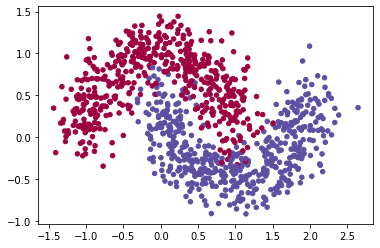

In [4]:
plt.scatter(X[:,0], X[:,1], c=Y, s=20, cmap=plt.cm.Spectral);

In [5]:
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, train_size=.60, random_state=11)        
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, train_size=.50, random_state=17)  

print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

(600, 2)
(600,)
(200, 2)
(200,)
(200, 2)
(200,)


In [6]:
mimodelo = MLPClassifier(solver = 'lbfgs', 
                    hidden_layer_sizes = (4,2),   #(4,2), 
                    activation = 'logistic',
                    batch_size = 600,
                    learning_rate = 'constant',
                    learning_rate_init = 1e-3,
                    max_iter = 200,
                    tol = 0.0001,
                    alpha = 0.,
                    verbose = True,
                    random_state = 7)

mimodelo.fit(X_train, Y_train)

/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(activation='logistic', alpha=0.0, batch_size=600,
              hidden_layer_sizes=(4, 2), random_state=7, solver='lbfgs',
              verbose=True)

In [7]:
yhat = mimodelo.predict_proba(X_test)
yhat = np.max(yhat, axis=1)

In [8]:
import numpy as np

In [9]:
LogLoss = sum(Y_test*np.log(yhat) + (1 - Y_test)*np.log(1-yhat)) / Y_test.shape[0]
LogLoss

-3.6911812395797745

In [10]:
print('Coeficientes:\n', mimodelo.coefs_)
print('Constantes:\n', mimodelo.intercepts_)

Coeficientes:
 [array([[ -0.57516638,  14.2014997 ,   5.56899509,  -3.27886098],
       [  0.15012115,  -6.92669834, -12.91816745,  -0.4533774 ]]), array([[ 46.5750251 ,  -9.38666615],
       [-18.31681865,   3.88987653],
       [  0.56863327,   0.23428724],
       [-10.08045924,  15.37423577]]), array([[-45.36687024],
       [ 34.93592301]])]
Constantes:
 [array([ 1.17409786, 16.29683855,  0.71782875,  1.9564226 ]), array([-8.51192976,  8.09753187]), array([-0.78893835])]


In [15]:
confusion_matrix(Y_val, yhat)

NameError: name 'confusion_matrix' is not defined

In [11]:
mimodelo.intercepts_

[array([ 1.17409786, 16.29683855,  0.71782875,  1.9564226 ]),
 array([-8.51192976,  8.09753187]),
 array([-0.78893835])]

In [12]:
neuronas = [i for i in range(1, 10, 1)]

print(neuronas)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [13]:

train_scores, val_scores = list(), list()

train_errors, val_errors = list(), list()


for i in neuronas:

  model = MLPClassifier(hidden_layer_sizes = (i,))

  model.fit(X_train, np.ravel(Y_train))


  # Predicciones y métricas con el conjunto de entrenamiento:
  train_yhat = model.predict(X_train)

  train_loss =  np.mean(abs(np.ravel(Y_train) - train_yhat))   
  train_errors.append(train_loss)

  train_acc = 1 - train_loss
  train_scores.append(train_acc)

  

  # Predicciones y métricas con el conjunto de prueba:
  val_yhat = model.predict(X_val)
  
  val_loss = np.mean(abs(np.ravel(Y_val) - val_yhat))
  val_errors.append(val_loss)

  val_acc = 1 - val_loss
  val_scores.append(val_acc)



  # evolución de las métricas durante el entrenamiento ...
  print('> %d...\t trainacc: %.3f, testacc: %.3f, trainloss: %.3f, testloss: %.3f' 
        % (i, train_acc, val_acc, train_loss, val_loss))

/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 1...	 trainacc: 0.773, testacc: 0.710, trainloss: 0.227, testloss: 0.290


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 2...	 trainacc: 0.808, testacc: 0.810, trainloss: 0.192, testloss: 0.190


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 3...	 trainacc: 0.850, testacc: 0.855, trainloss: 0.150, testloss: 0.145


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 4...	 trainacc: 0.842, testacc: 0.835, trainloss: 0.158, testloss: 0.165


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 5...	 trainacc: 0.812, testacc: 0.770, trainloss: 0.188, testloss: 0.230


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 6...	 trainacc: 0.870, testacc: 0.860, trainloss: 0.130, testloss: 0.140


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 7...	 trainacc: 0.883, testacc: 0.875, trainloss: 0.117, testloss: 0.125


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


> 8...	 trainacc: 0.867, testacc: 0.890, trainloss: 0.133, testloss: 0.110
> 9...	 trainacc: 0.857, testacc: 0.875, trainloss: 0.143, testloss: 0.125


/home/bryan/.local/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


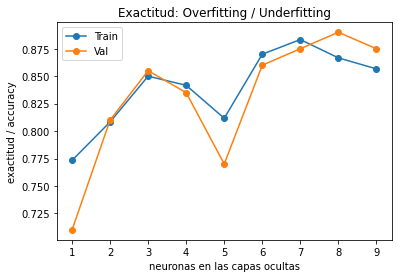

NameError: name 'profundidad' is not defined

In [14]:
plt.plot(neuronas, train_scores, '-o', label='Train')
plt.plot(neuronas, val_scores, '-o', label='Val')
plt.legend()
plt.title('Exactitud: Overfitting / Underfitting')
plt.xlabel('neuronas en las capas ocultas')
plt.ylabel('exactitud / accuracy')
plt.show()

plt.plot(profundidad, train_errors, '-o', label='Train')
plt.plot(profundidad, val_errors, '-o', label='Val')
plt.legend()
plt.title('Error: Caso Overfitting / Underfitting')
plt.xlabel('neuronas en as capas ocultas')
plt.ylabel('error / loss')
plt.show()